In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("suicide_rate.csv")

In [3]:
df['GDP'] = df['GDP'].str.replace(",", "")
df['GDP'] = df['GDP'].astype(int)
df = df.drop("HDI for year", 1)
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,GDP,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,63067077179,2309,Generation Z


In [4]:
df2 = df[['country-year','GDP', 'gdp_per_capita']]
df2.drop_duplicates()

,country-year,GDP,gdp_per_capita
0,Albania1987,2156624900,796
12,Albania1988,2126000000,769
24,Albania1989,2335124988,833
36,Albania1992,709452584,251
48,Albania1993,1228071038,437
...,...,...,...
27760,Uzbekistan2010,39332770929,1533
27772,Uzbekistan2011,45915191189,1767
27784,Uzbekistan2012,51821573338,1964
27796,Uzbekistan2013,57690453461,2150


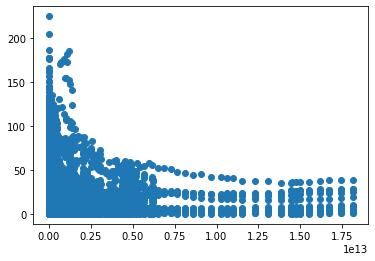

In [5]:
plt.scatter(df2["GDP"],df['suicides/100k pop'])

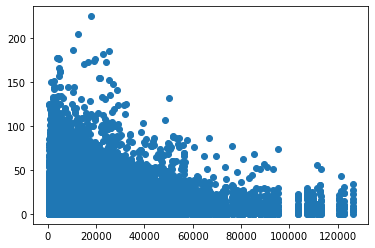

In [6]:
plt.scatter(df2["gdp_per_capita"],df['suicides/100k pop'])

Text(0.5, 1.0, 'Suicide by GDP per capita (1985 - 2015)')

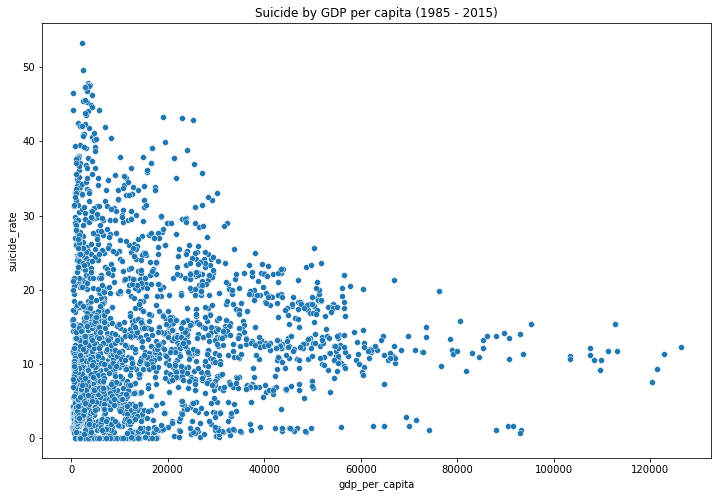

In [7]:
gdp_suicide_df = df.groupby(by=['country', 'year', 'gdp_per_capita']).agg({"suicides/100k pop": ['mean']})
# change name to suicide_rate
gdp_suicide_df.columns = ["suicide_rate"]
# change to default index in place
gdp_suicide_df.reset_index(inplace=True)

plt.figure(figsize=(12, 8))
sns.scatterplot(x="gdp_per_capita", y="suicide_rate", data=gdp_suicide_df)
plt.title('Suicide by GDP per capita (1985 - 2015)')

Since both GDP and suicide number might depend on number of population, we evaluate the GDP per capita and suicide number per 100k population (suicide rate) that can be more representative of population. Based on the scatterplot between the suicide rate and GDP per capita, there seems to be a more negative correlation between the two variables in the sense that as the number of gdp per capital ($) increases, the rate of suicide also increases. It appears comparing to countries with low GDP per capita, countries with high GDP capita are experiencing lower suicide rate. However, there are also countries with both low GDP per capita and low suicide rate suggesting that GDP is not the solo factor that affects suicide rate and there are other societal influences. 

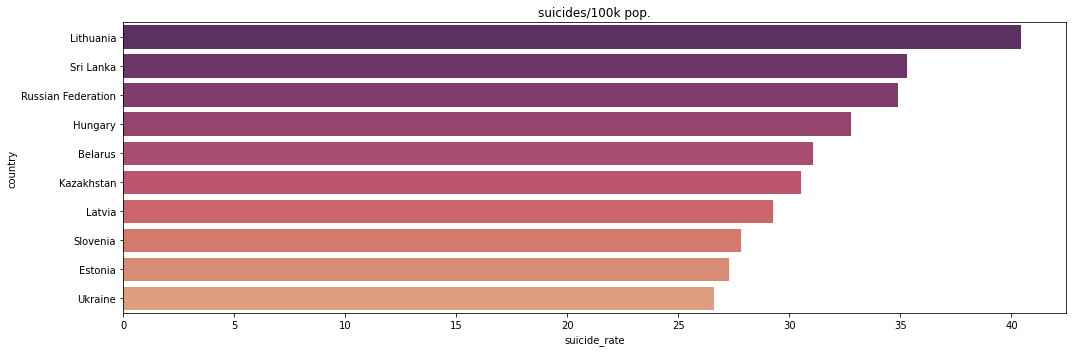

In [8]:
#suicide_rate1 = pd.DataFrame(df['suicides/100k pop'].groupby(df['country']).mean())
suicide_rate = df.groupby(by=['country']).agg({"suicides/100k pop": ['mean']})
suicide_rate.columns = ["suicide_rate"]
suicide_rate = suicide_rate.reset_index()
suicide_rate_sorted = suicide_rate.sort_values(by="suicide_rate", ascending=False).head(10)

fig = plt.figure(figsize=(15,5))
plt.title('suicides/100k pop.')
sns.barplot(x='suicide_rate',y='country',data=suicide_rate_sorted, palette="flare_r");
plt.ylabel('country')
plt.tight_layout()

The bar chart shows the top 10 countries with the highest mean suicide number per 100k population. They are 'Lithuania','Sri Lanka', 'Russian Federation','Hungary', 'Belarus', 'Kazakhstan', 'Latvia', 'Slovenia', 'Estonia', and 'Ukraine'. The highest mean suicide number per 100k population  is around 40. 

In [9]:
df_gdp = df.groupby(["country","year"]).gdp_per_capita.mean()
df_sui = df.groupby(["country","year"])['suicides/100k pop'].mean()

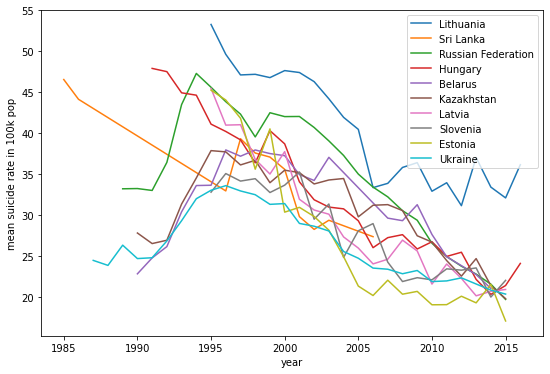

In [10]:
plt.figure(figsize = (9,6))
countries = ['Lithuania','Sri Lanka', 'Russian Federation','Hungary', 'Belarus', 
             'Kazakhstan', 'Latvia', 'Slovenia', 'Estonia', 'Ukraine']
for country in countries:
    plt.plot(df_sui[country].index ,df_sui[country].values, label=country)
plt.xlabel("year")
plt.ylabel("mean suicide rate in 100k pop")
plt.legend()

Based on the top 10 countries with the highest mean suicide number per 100k population, we want to evaluate how each country's GDP per capita and rate of suicide changed over the years between 1985 and 2016. The GDP per capital for all 10 countries gradually increased in the span of 31 years with a slight dip in 2008 when great recession occured. The rate of suicide follows an opposite trend as it gradually decreased over the years.

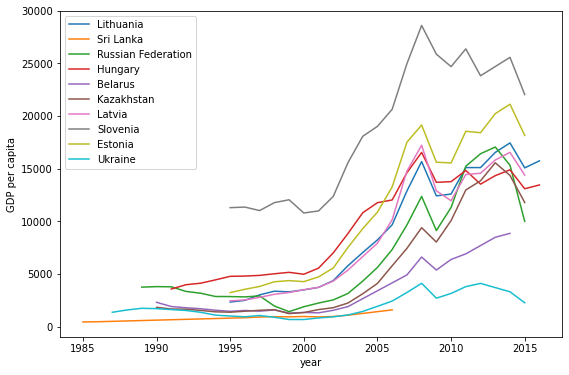

In [11]:
plt.figure(figsize = (9,6))
countries = ['Lithuania','Sri Lanka', 'Russian Federation','Hungary', 'Belarus', 
             'Kazakhstan', 'Latvia', 'Slovenia', 'Estonia', 'Ukraine']
for country in countries:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country)
plt.xlabel("year")
plt.ylabel("GDP per capita")
plt.legend()

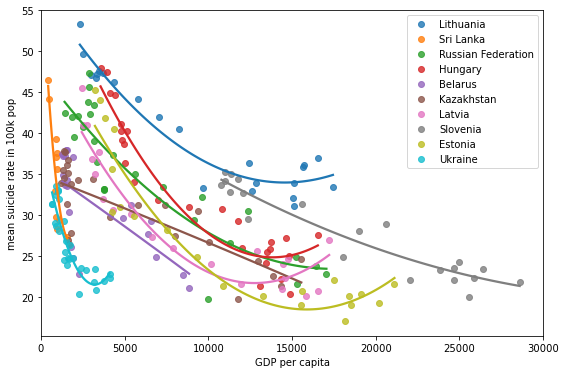

In [12]:
plt.figure(figsize = (9,6))
countries = ['Lithuania','Sri Lanka', 'Russian Federation','Hungary', 'Belarus', 
             'Kazakhstan', 'Latvia', 'Slovenia', 'Estonia', 'Ukraine']
for country in countries:
    sns.regplot(x=df_gdp[country].values, y=df_sui[country].values, label = country, order=2, ci=None)
plt.xlabel("GDP per capita")
plt.ylabel("mean suicide rate in 100k pop")
plt.xlim(0, 30000)
plt.legend()

To see clearly what happened between the GDP per capita and mean suicide number per 100k population for the 10 countries, we performed a regression plot on each country. Unsuprisingly, for each country, there is a negative correlation between the GDP per capita and rate of suicide. This is indicative that as the GDP per capita in a country increases, the rate of suicide will likely decline. 

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [14]:
df_model = gdp_suicide_df.loc[gdp_suicide_df['gdp_per_capita'] > 40000]

In [15]:
# GDP is the feature
# suicide rate is the target

X = df_model['gdp_per_capita'].values.reshape(-1, 1)
y = df_model['suicide_rate'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
X_train = X_train
X_test = X_test
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("linear regression score: ", score)

linear regression score:  0.006476727037874719


In [16]:
cv_score = cross_val_score(model, X, y, cv=5, scoring='r2')

In [17]:
print("cross validation score: ", cv_score)

cross validation score:  [-0.27829698  0.00418745 -0.05366015 -0.75898299 -0.10678561]


In [18]:
print("cross validation score mean: ", cv_score.mean())

cross validation score mean:  -0.23870765729235033
